In [1]:
# Plot one similar event alongside the template event

In [2]:
## Importing modules
from matplotlib import pyplot as plt
from obspy import read, UTCDateTime
from snuffler_utils import read_normal_markers
from preproc_utils import preprocess_stream
from os.path import join
import pandas as pd

ImportError: cannot import name 'read_picks' from 'snuffler_utils' (/Volumes/OmanData/geophones_no_prefilt/scripts/snuffler_utils.py)

In [ ]:
## Inputs

root = "/Volumes/OmanData/geophones_no_prefilt/data"
timewin_tmp = "2020-01-12-17-00-00"
evname_tmp = "Example2"
evname_match = "Match1"

begin = -0.01
end_long = 0.2
end_short = 0.05

freqmin = 10
freqmax = None

In [ ]:
## Read the template event information
inpath = join(root, timewin_tmp, f"Ppicks_{evname_tmp}.dat")
tmpdf = read_picks(inpath)

In [ ]:
## Read the matched event information
inpath = join(root, timewin_tmp, f"{evname_tmp}_{evname_match}.csv")
matchdf = pd.read_csv(inpath, sep=" ", index_col=0)
numst_match = len(matchdf)

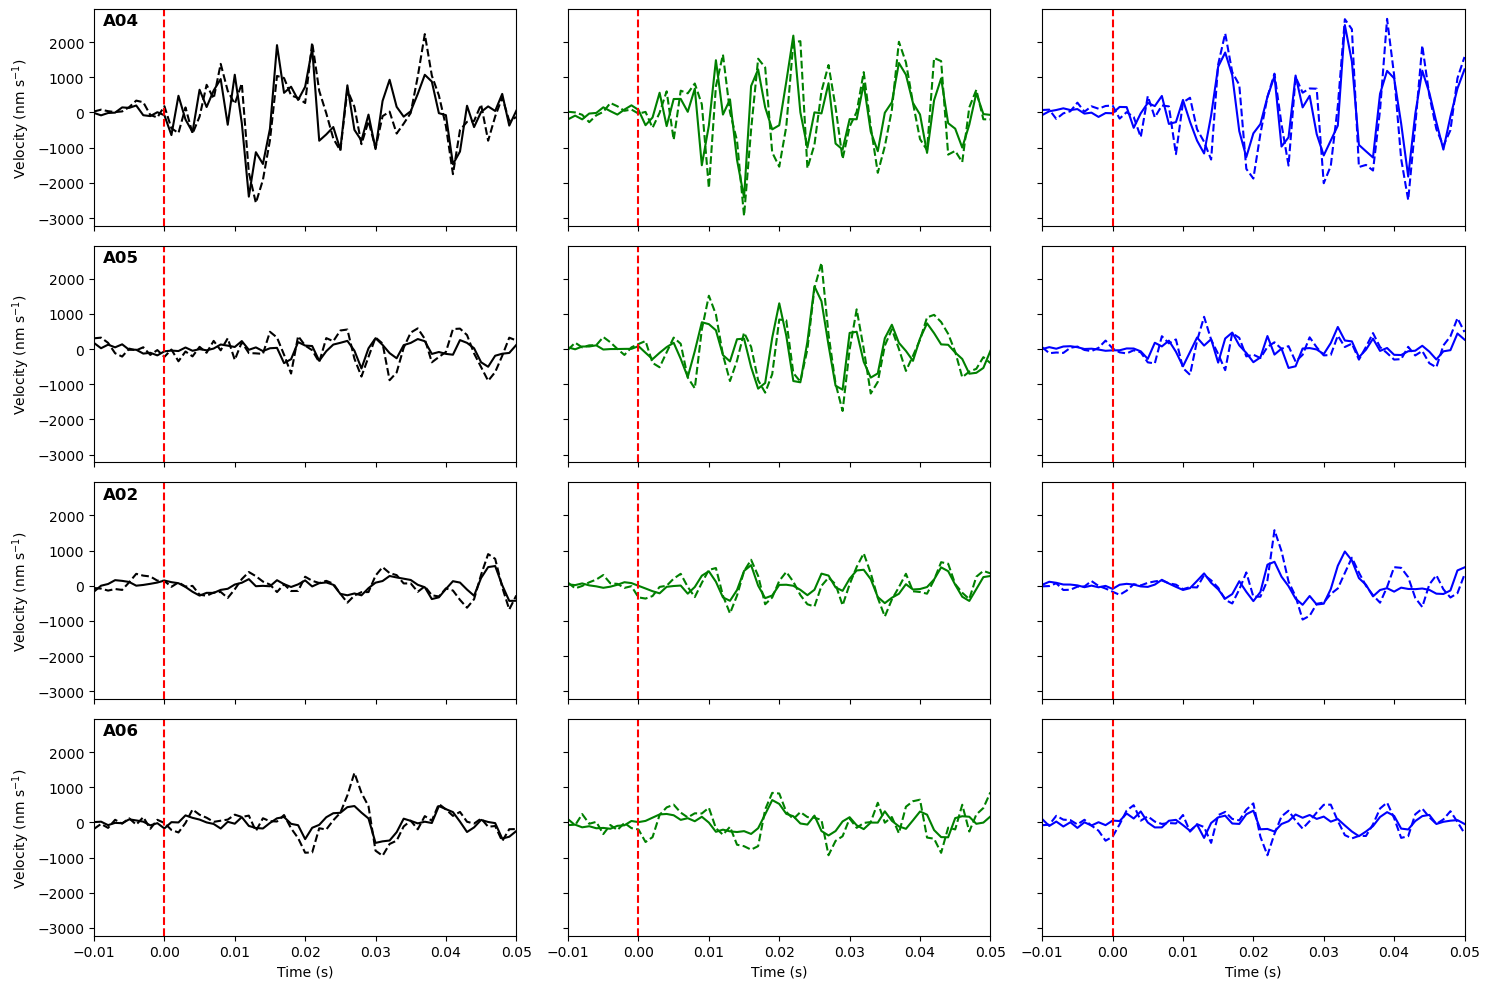

In [ ]:
## Read, process, and plot the waveforms of the template and similar events in the short time window
fig, axes = plt.subplots(nrows=numst_match, ncols=3, sharex=True, sharey=True, figsize=(15, 10))

for i, row in matchdf.iterrows():

    ### The matched event
    stname = row["station"]
    time = UTCDateTime(row["peak_time"])
    amprat_z = row["amplitude_ratio_z"]
    amprat_1 = row["amplitude_ratio_1"]
    amprat_2 = row["amplitude_ratio_2"]
    amprat = (amprat_z + amprat_1 + amprat_2)/3

    timewin = time.strftime("%Y-%m-%d-%H-00-00")

    pattern = join(root, timewin, f"*{stname}*.SAC")
    stream = read(pattern)

    stream = preprocess_stream(stream, freqmin, freqmax)
    stream.trim(time + begin, time + end_short)

    trace_z = stream.select(channel="*Z")[0]
    trace_1 = stream.select(channel="*1")[0]
    trace_2 = stream.select(channel="*2")[0]
    timeax = trace_z.times()+begin

    data_z = trace_z.data/amprat
    data_1 = trace_1.data/amprat
    data_2 = trace_2.data/amprat

    axes[i, 0].plot(timeax, data_z, "k--")
    axes[i, 1].plot(timeax, data_1, "g--")
    axes[i, 2].plot(timeax, data_2, "b--")

    ### The template event
    tmpdf_st = tmpdf.loc[tmpdf["station"] == stname]
    tmpdf_st.reset_index(inplace=True, drop=True)
    time = UTCDateTime(tmpdf_st["datetime"][0])

    pattern = join(root, timewin_tmp, f"*{stname}*.SAC")
    stream = read(pattern)

    stream = preprocess_stream(stream, freqmin, freqmax)
    stream.trim(time + begin, time + end_short)

    trace_z = stream.select(channel="*Z")[0]
    trace_1 = stream.select(channel="*1")[0]
    trace_2 = stream.select(channel="*2")[0]

    data_z = trace_z.data
    data_1 = trace_1.data
    data_2 = trace_2.data

    axes[i, 0].plot(timeax, data_z, "k-")
    axes[i, 1].plot(timeax, data_1, "g-")
    axes[i, 2].plot(timeax, data_2, "b-")

    ### Annotate the axes
    axes[i, 0].text(0.02, 0.98, f"{stname}", transform=axes[i, 0].transAxes, horizontalalignment="left", verticalalignment="top", fontsize=12, fontweight="bold")

    ### Plot the P wave pick
    axes[i, 0].axvline(0, color="r", linestyle="--")
    axes[i, 1].axvline(0, color="r", linestyle="--")
    axes[i, 2].axvline(0, color="r", linestyle="--")
    
    ### Set the axes attributes
    axes[i, 0].set_xlim(begin, end_short)

    axes[i, 0].set_ylabel("Velocity (nm s$^{-1}$)")


axes[numst_match-1, 0].set_xlabel("Time (s)")
axes[numst_match-1, 1].set_xlabel("Time (s)")
axes[numst_match-1, 2].set_xlabel("Time (s)")

### Save the figure
fig.tight_layout()

outpath = join(root, timewin_tmp, f"{evname_match}_{evname_tmp}_short.png")
fig.savefig(outpath, dpi=300, transparent=True)




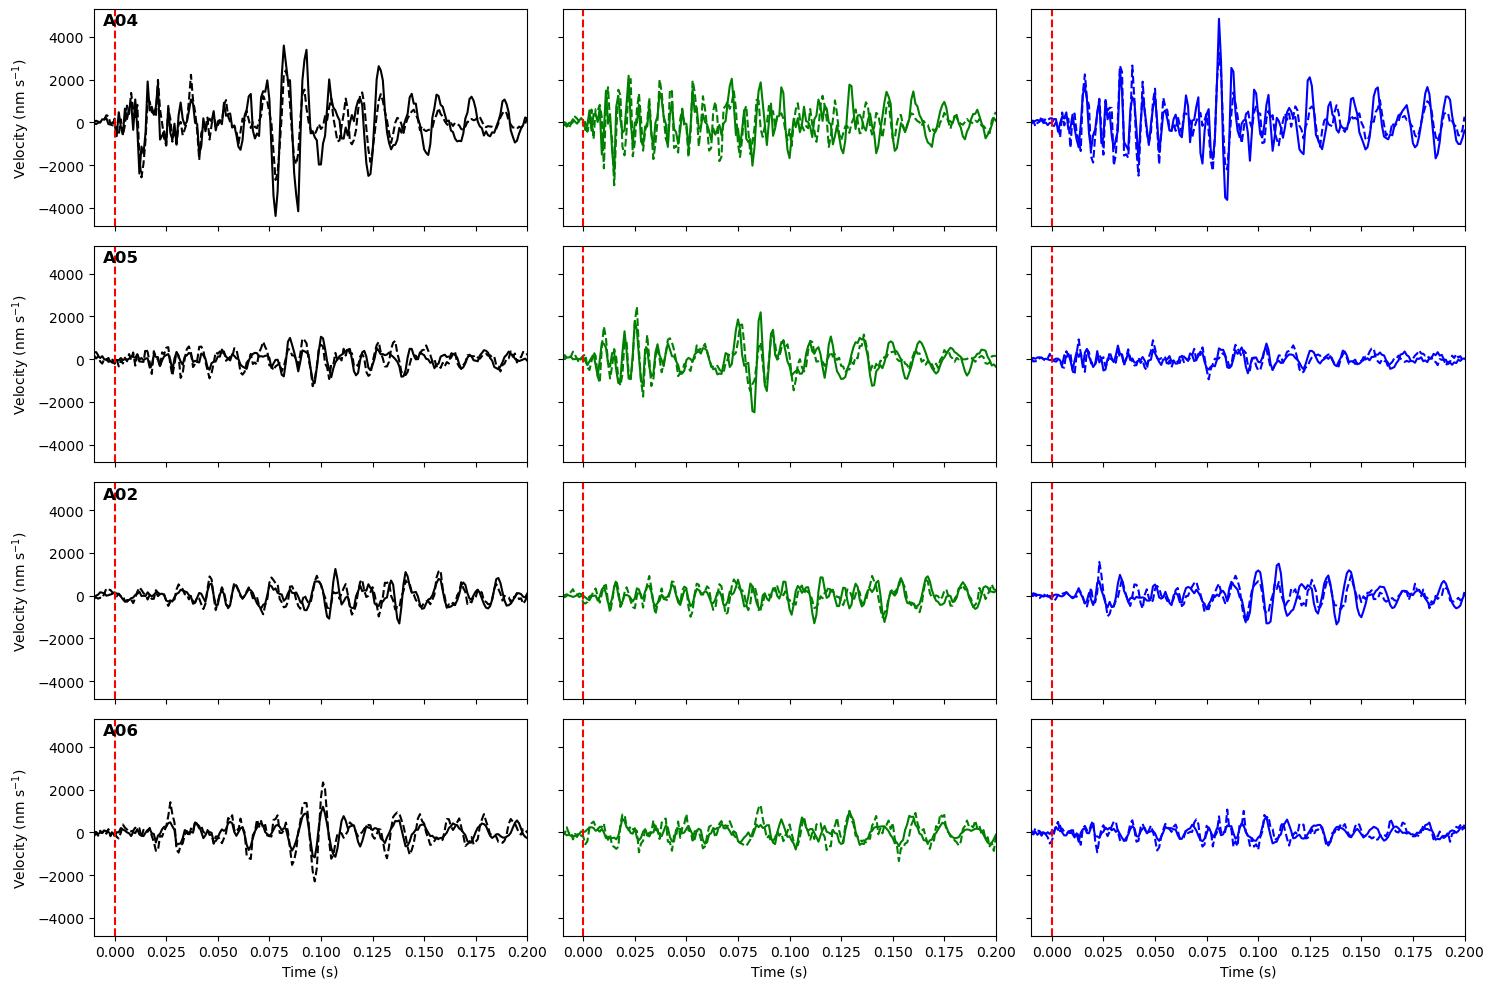

In [ ]:
## Read, process, and plot the waveforms of the template and matched events in the long time window
fig, axes = plt.subplots(nrows=numst_match, ncols=3, sharex=True, sharey=True, figsize=(15, 10))

for i, row in matchdf.iterrows():

    ### The matched event
    stname = row["station"]
    time = UTCDateTime(row["peak_time"])
    amprat_z = row["amplitude_ratio_z"]
    amprat_1 = row["amplitude_ratio_1"]
    amprat_2 = row["amplitude_ratio_2"]
    amprat = (amprat_z + amprat_1 + amprat_2)/3

    timewin = time.strftime("%Y-%m-%d-%H-00-00")

    pattern = join(root, timewin, f"*{stname}*.SAC")
    stream = read(pattern)

    stream = preprocess_stream(stream, freqmin, freqmax)
    stream.trim(time + begin, time + end_long)

    trace_z = stream.select(channel="*Z")[0]
    trace_1 = stream.select(channel="*1")[0]
    trace_2 = stream.select(channel="*2")[0]
    timeax = trace_z.times()+begin

    data_z = trace_z.data/amprat
    data_1 = trace_1.data/amprat
    data_2 = trace_2.data/amprat

    axes[i, 0].plot(timeax, data_z, "k--")
    axes[i, 1].plot(timeax, data_1, "g--")
    axes[i, 2].plot(timeax, data_2, "b--")

    ### The template event
    tmpdf_st = tmpdf.loc[tmpdf["station"] == stname]
    tmpdf_st.reset_index(inplace=True, drop=True)
    time = UTCDateTime(tmpdf_st["datetime"][0])

    pattern = join(root, timewin_tmp, f"*{stname}*.SAC")
    stream = read(pattern)

    stream = preprocess_stream(stream, freqmin, freqmax)
    stream.trim(time + begin, time + end_long)

    trace_z = stream.select(channel="*Z")[0]
    trace_1 = stream.select(channel="*1")[0]
    trace_2 = stream.select(channel="*2")[0]

    data_z = trace_z.data
    data_1 = trace_1.data
    data_2 = trace_2.data

    axes[i, 0].plot(timeax, data_z, "k-")
    axes[i, 1].plot(timeax, data_1, "g-")
    axes[i, 2].plot(timeax, data_2, "b-")

    ### Annotate the axes
    axes[i, 0].text(0.02, 0.98, f"{stname}", transform=axes[i, 0].transAxes, horizontalalignment="left", verticalalignment="top", fontsize=12, fontweight="bold")

    ### Plot the P wave pick
    axes[i, 0].axvline(0, color="r", linestyle="--")
    axes[i, 1].axvline(0, color="r", linestyle="--")
    axes[i, 2].axvline(0, color="r", linestyle="--")
    
    ### Set the axes attributes
    axes[i, 0].set_xlim(begin, end_long)

    axes[i, 0].set_ylabel("Velocity (nm s$^{-1}$)")


axes[numst_match-1, 0].set_xlabel("Time (s)")
axes[numst_match-1, 1].set_xlabel("Time (s)")
axes[numst_match-1, 2].set_xlabel("Time (s)")

### Save the figure
fig.tight_layout()

outpath = join(root, timewin_tmp, f"{evname_tmp}_{evname_match}_long.png")
fig.savefig(outpath, dpi=300, transparent=True)